In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
from sklearn.datasets import make_circles, make_moons

In [4]:
# X, y = make_circles(n_samples=100, noise=0.1, factor=0.1)
X, y = make_moons(n_samples=100, noise=0.1, random_state=666)

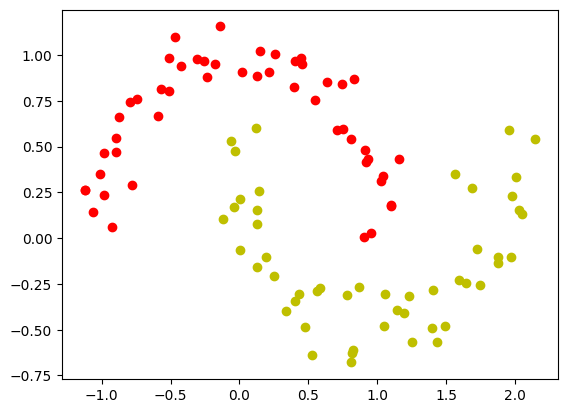

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='r')
plt.scatter(X[y==1, 0], X[y==1, 1], c='y')
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
knn = KNeighborsClassifier(n_jobs=-1)
logistic = LogisticRegression(n_jobs=-1)

In [8]:
logistic.fit(X, y)

LogisticRegression(n_jobs=-1)

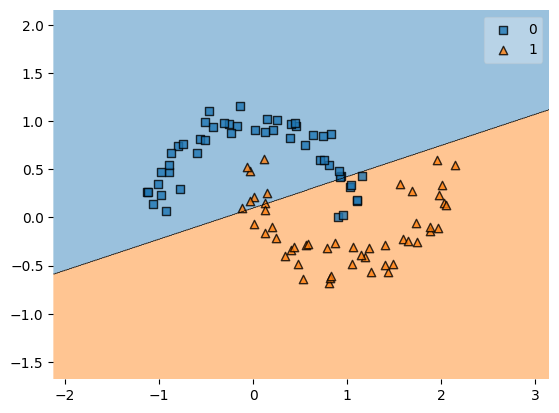

In [9]:
plot_decision_regions(X, y, logistic)
plt.show()

In [10]:
knn.fit(X, y)

KNeighborsClassifier(n_jobs=-1)

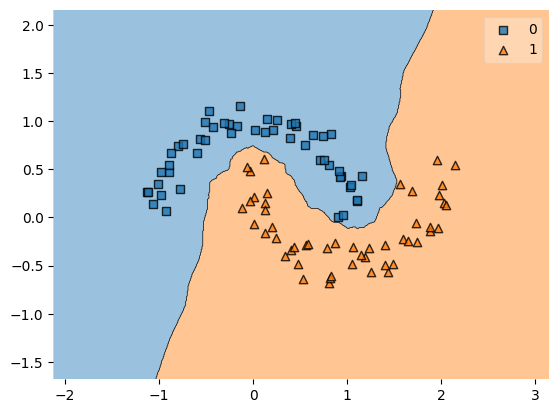

In [11]:
plot_decision_regions(X, y, knn)
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X, y)

DecisionTreeClassifier()

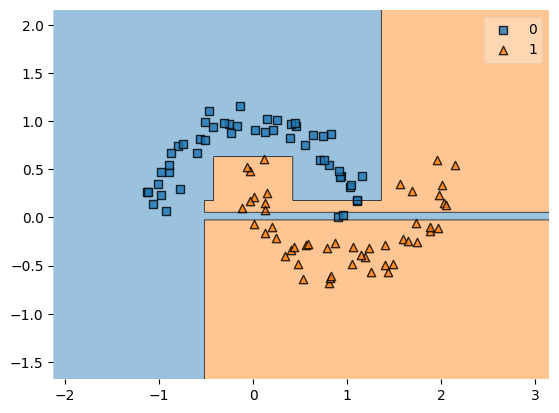

In [15]:
plot_decision_regions(X, y, dtree)
plt.show()

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [17]:
iris_data = load_iris()

In [18]:
X = iris_data.data
y = iris_data.target

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# X = X[:100]
# y = y[:100]

In [20]:
from collections import Counter

In [21]:
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=666,
                                                    shuffle=True,
                                                    stratify=y)

In [23]:
logit = LogisticRegression(n_jobs=-1)

In [24]:
logit.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [25]:
y_pred = logit.predict(X_test)

In [26]:
y_test

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0,
       0])

In [27]:
y_pred

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0,
       0])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [29]:
accuracy_score(y_test, y_pred)

0.9130434782608695

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[8, 0, 0],
       [0, 6, 1],
       [0, 1, 7]], dtype=int64)

In [31]:
import seaborn as sns

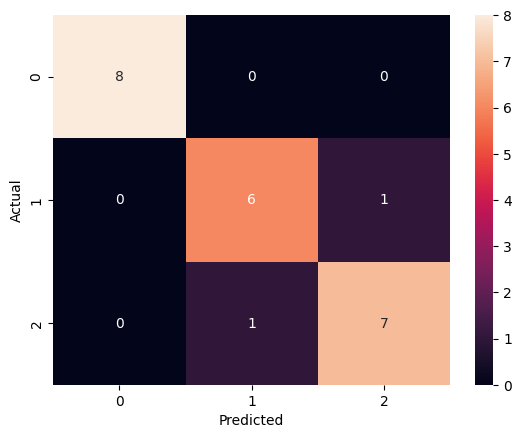

In [32]:
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Precision(P): $\frac{TP}{TP + FP}$
* Recall(R): $\frac{TP}{TP + FN}$
* F1 : $\frac{2PR}{P + R}$
* Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$

In [33]:
p = 0.3
r = 0.99
(p + r) / 2

0.645

In [34]:
(2 * p * r)/(p + r)

0.4604651162790697

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.86      0.86      0.86         7
           2       0.88      0.88      0.88         8

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23

